In [1]:
import matplotlib.transforms as mtransforms
import matplotlib.pyplot as plt 
import matplotlib as mpl
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np 
import string
import pickle
from scipy.stats import poisson

In [2]:
import ordpy
%run ./ordpy.py

In [3]:
edges = pd.read_csv('commuters/data/br_commuters.csv')
info = pd.read_csv('commuters/data/br_info.csv')

In [4]:
estados = info[~(info.STATE=='DF')].STATE.unique()

In [3]:
G = nx.read_gml('random-1.gml')

In [4]:
G_2 = nx.read_gml('random-10.gml')

In [5]:
G_3 = nx.read_gml('random-100.gml')

In [6]:
with open('data/y_3.pkl', 'rb') as file:
    y_3 = pickle.load(file)

In [7]:
short_path = nx.read_gpickle('short_path.gml')

In [8]:
with open ('data/y.pkl', 'rb') as file:
    y = pickle.load(file)

In [9]:
with open ('/home/carlos/repos/random-network/commuters/data/linear_regress.pkl', 'rb') as file:
    linear_regress = pickle.load(file)

with open ('/home/carlos/repos/random-network/commuters/data/x_linear_regress.pkl', 'rb') as file:
    x = pickle.load(file)

with open ('/home/carlos/repos/random-network/commuters/data/y_linear_regress.pkl', 'rb') as file:
    y = pickle.load(file)

with open ('/home/carlos/repos/random-network/commuters/data/logn_vs_avgpath.pkl' , 'rb') as file:
    logn_vs_avgpath = pickle.load(file)    


In [10]:
point_color = '#8856a7'
line_color = '#8c96c6'
edge_color = '#000000'

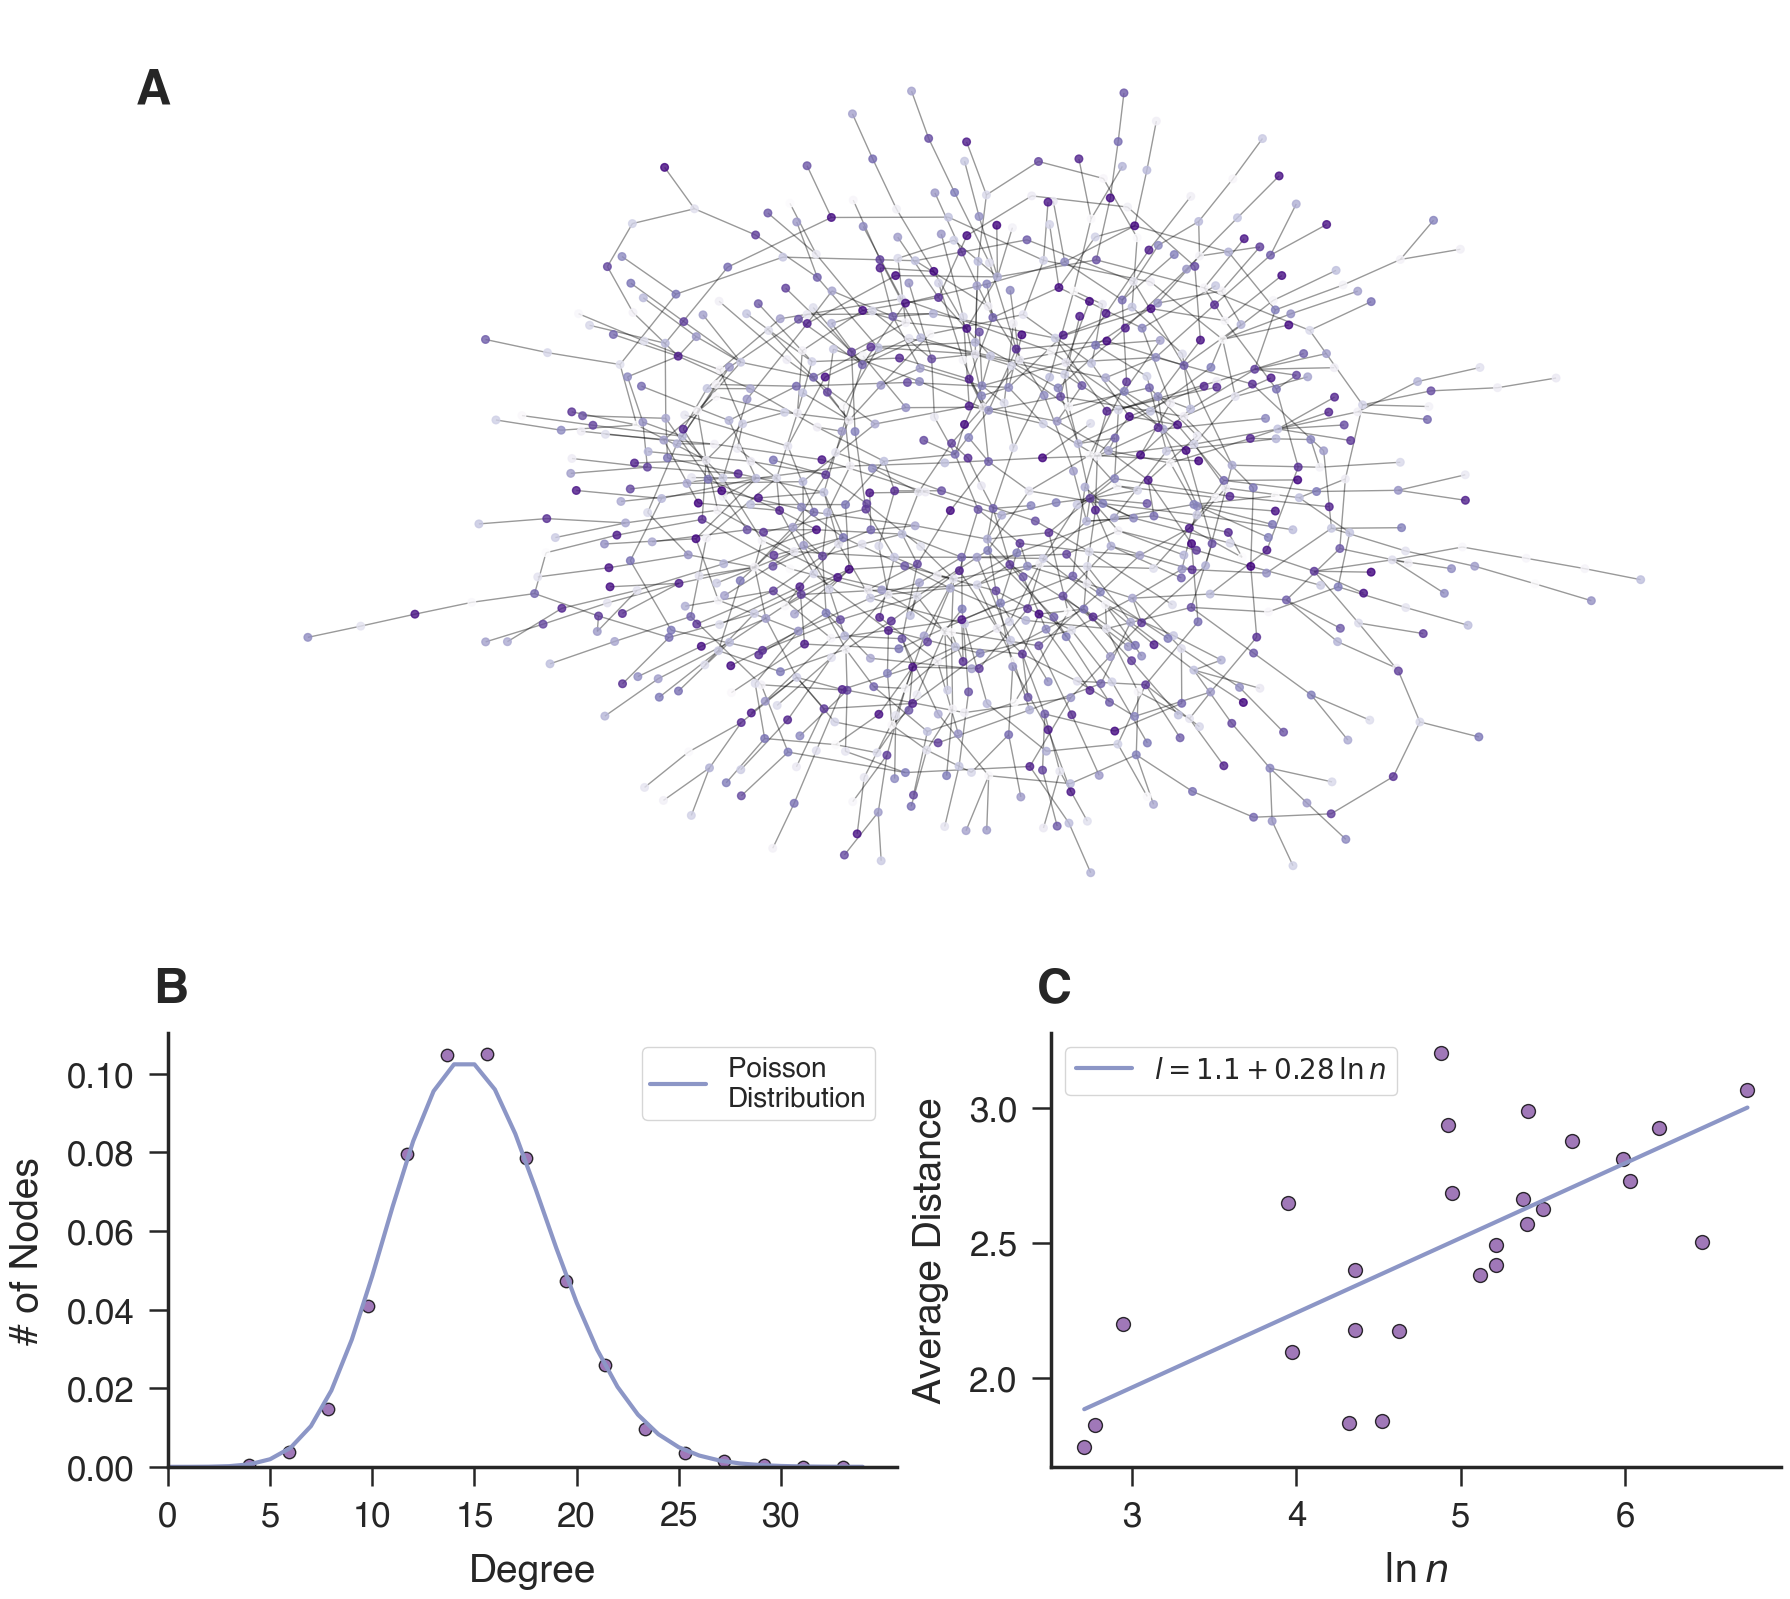

In [14]:
mosaic = 'AAAA;AAAA;AAAA;AAAA;BBCC;BBCC'
fig = plt.figure(constrained_layout = True, 
                 figsize = stdfigsize(nrows = 2.3 ,ncols=2))
ax_dict = fig.subplot_mosaic(mosaic)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
Gcc = nx.read_gpickle('Gcc.gpickle')
pos = nx.read_gpickle('draw-pos.gpickle')
nx.draw_networkx_nodes(Gcc, pos, ax=ax_dict['A'], alpha=.8,node_size=30, node_color = range(len(Gcc)), cmap=plt.cm.Purples )
nx.draw_networkx_edges(Gcc, pos, ax=ax_dict['A'], alpha=.4)
ax_dict['A'].set_axis_off()


degree_list = list(G_2.degree())
new_degree_list = list(map(lambda x: x[1], degree_list))
counts,bin_edges = np.histogram(new_degree_list, bins = 16, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
ax_dict['B'].scatter(bin_centres, counts, marker='o', c = point_color, alpha=.8, edgecolors=edge_color, s=80)
lin = np.arange(0, 35)
ax_dict['B'].plot(lin, poisson.pmf(lin, mu= 15), c=line_color, label='Poisson \nDistribution')
ax_dict['B'].set_xlabel('Degree')
ax_dict['B'].set_ylabel('# of Nodes')
ax_dict['B'].set_xticks(np.arange(0, 35, 5))
ax_dict['B'].set_ylim(0,)
ax_dict['B'].set_xlim(0,)
ax_dict['B'].legend( loc=[.65, .8], 
                      borderpad=0.3)


# x_line = [G_3.number_of_nodes() ,G_2.number_of_nodes()]
# y_line = [y_3, y] 
# avg_path = np.load('/home/carlos/Downloads/facebook_clean_data/avg_path.npy')
ln_n = np.load('/home/carlos/Downloads/facebook_clean_data/ln_n.npy')
ln_n = np.log(10**ln_n)


ax_dict['C'].plot(*logn_vs_avgpath.T, 'o', markersize=10, markeredgecolor=edge_color, color=point_color, alpha=.8)
ax_dict['C'].plot(x, y,color=line_color,  label='$l = 1.1 + 0.28\, \ln n$')
ax_dict['C'].set_xlabel('$\ln n$')
ax_dict['C'].set_ylabel('Average Distance')
ax_dict['C'].legend()


# for label, ax in ax_dict.items():
#     # label physical distance in and down:
#     trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
#     ax.text(.8, 1.0, label, transform=ax.transAxes + trans,
#             fontsize=18, horizontalalignment='center', verticalalignment='center', fontfamily='Helvetica',
#             bbox=dict(facecolor='1', edgecolor='none', pad=3.0))
    
for (i, ax_), y_ in zip(enumerate([ax_dict['A'], ax_dict['B'], ax_dict['C']]), [.9, 1.07,1.07]):
    # ax_.annotate('(' + string.ascii_lowercase[i] + ')', (-.035,1.07), xycoords='axes fraction', fontsize=30, )
    ax_.annotate(string.ascii_uppercase[i], (-.02, y_), xycoords='axes fraction', fontsize=35, weight='bold')

fig.tight_layout()
# fig.savefig('figures/final-1.1.pdf', dpi=300, bbox_inches='tight')

In [15]:
ax_dict['C']

<AxesSubplot: label='C', xlabel='$\\ln n$', ylabel='Average Distance'>

In [ ]:
import networkx as nx

G = nx.DiGraph()
G.add_edge(1,2,weight=7)
G.add_edge(1,3,weight=42)

G.degree(weight='weight')

G.in_degree(weight='weight')

G.out_degree(weight='weight')

[m.T[x,y] for x,y in np.concatenate([np.triu_indices(3,1)]).T] + [m[x,y] for x,y in np.concatenate([np.triu_indices(3,1)]).T]

In [5]:
def cdf(data, nbins=15, log=False, surv=True):
    """
    Estimates the survival distribution from a np.array.

    Parameters
    ----------
    data: np.array
    nbins: number of bins.
    log: True for log-spaced bins (Default: False).
    surv: False for cumulative distribution function (Default: True).
    ----------
    Returns [bins,pdf].
    """
    size = len(data)
    if log:
        bins = np.logspace(np.log10(np.min(data)), np.log10(np.max(data)), nbins)
    else:
        bins = np.linspace(np.min(data), np.max(data),nbins)        
    densities = np.array([len(data[data>=binvalue])/size for binvalue in bins])
    if not surv:
        densities = 1 - densities
    return(np.transpose([bins, densities]))

In [7]:
def cdf(data, nbins=15, log=False, surv=True):
    """
    Estimates the survival distribution from a np.array.

    Parameters
    ----------
    data: np.array
    nbins: number of bins.
    log: True for log-spaced bins (Default: False).
    surv: False for cumulative distribution function (Default: True).
    ----------
    Returns [bins,pdf].
    """
    size = len(data)
    if log:
        bins = np.logspace(np.log10(np.min(data)), np.log10(np.max(data)), nbins)
    else:
        bins = np.linspace(np.min(data), np.max(data),nbins)        
    densities = np.array([len(data[data>=binvalue])/size for binvalue in bins])
    if not surv:
        densities = 1 - densities
    return(np.transpose([bins, densities]))

def return_something(estado: str) -> nx.subgraph:

    if estado == 'all':
        df_ = edges
    else:
        df_ = edges[edges.source.isin(info[info.STATE==estado].CODE.unique()) & edges.target.isin(info[info.STATE==estado].CODE.unique())]
        state_commuters_graph = nx.from_pandas_edgelist(df=df_ , edge_attr='weight', create_using=nx.DiGraph)
        m = nx.adjacency_matrix(state_commuters_graph).todense()
        m_shape = m.shape[0]
        return state_commuters_graph
        # pesos = np.asarray([m.T[x,y] for x,y in np.concatenate([np.triu_indices(m_shape,1)]).T] + [m[x,y] for x,y in np.concatenate([np.triu_indices(m_shape,1)]).T])
        # logxyplot([cdf(br_commuters[br_commuters.weight>0]['weight'].values,nbins=1000).T],fmt='-o')
        

/tmp/ipykernel_14354/394986029.py:31: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  m = nx.adjacency_matrix(state_commuters_graph).todense()


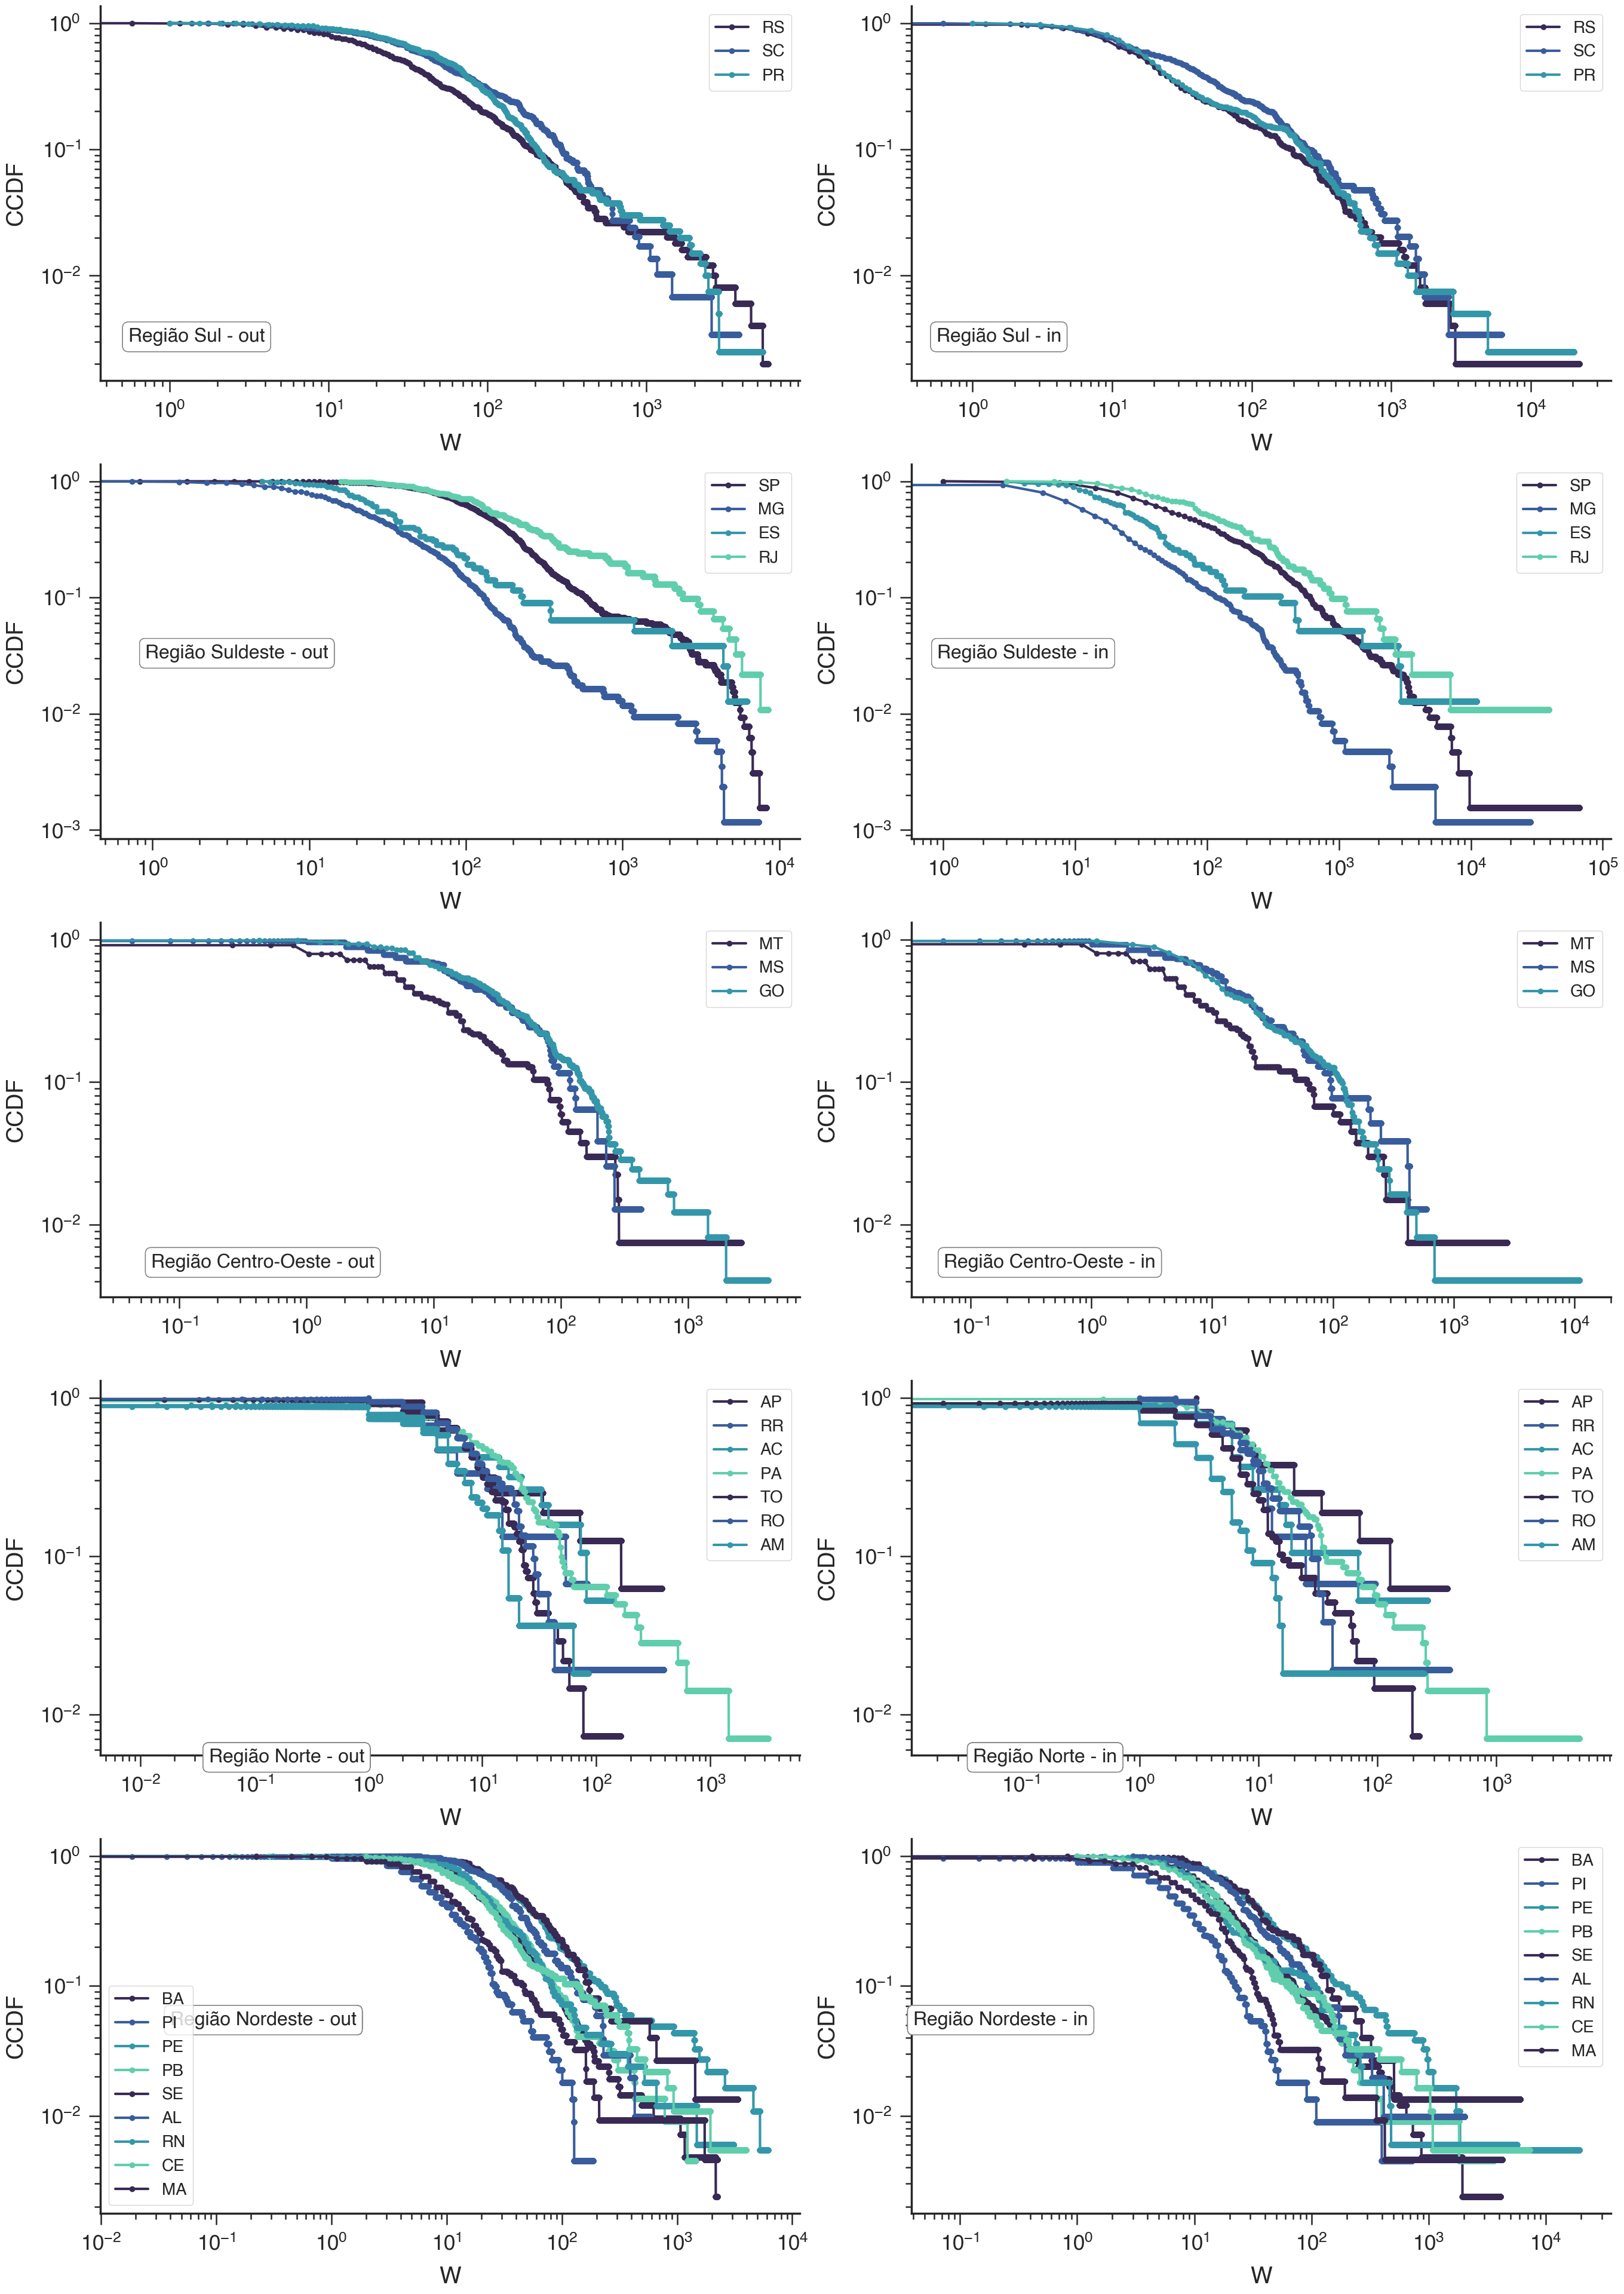

In [46]:
with sns.color_palette("mako", n_colors=4):
    f, ax = plt.subplots(constrained_layout=True, 
                         nrows=5, ncols=2, 
                         figsize=ordpy.stdfigsize(nrows=5.5,ncols=3))
    for state in ['RS','SC','PR']:
            state_commuters_graph = return_something(state)            
            posx_, posy_ = .55, .003
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
            ax[0,0].loglog(*cdf(np.asarray(list(state_commuters_graph.out_degree(weight='weight')))[::,1], nbins=10000).T,'-o',label=state)
            ax[0,1].loglog(*cdf(np.asarray(list(state_commuters_graph.in_degree(weight='weight')))[::,1], nbins=10000).T,'-o',label=state)
            ax[0,0].set_xlabel('W')
            ax[0,0].set_ylabel('CCDF')
            ax[0,0].legend()
            ax[0,1].set_xlabel('W')
            ax[0,1].set_ylabel('CCDF')
            ax[0,1].legend()
            ax[0,0].text(posx_, posy_, "Região Sul - out", size=23,bbox=bbox_props)
            ax[0,1].text(posx_, posy_, "Região Sul - in", size=23,bbox=bbox_props)
            plt.tight_layout()

    for state in ['SP','MG','ES','RJ']:
            state_commuters_graph = return_something(state)            
            posx_, posy_ = .9, .03
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
            ax[1,0].loglog(*cdf(np.asarray(list(state_commuters_graph.out_degree(weight='weight')))[::,1], nbins=10000).T,'-o',label=state)
            ax[1,1].loglog(*cdf(np.asarray(list(state_commuters_graph.in_degree(weight='weight')))[::,1], nbins=10000).T,'-o',label=state)
            ax[1,0].set_xlabel('W')
            ax[1,0].set_ylabel('CCDF')
            ax[1,0].legend()
            ax[1,1].set_xlabel('W')
            ax[1,1].set_ylabel('CCDF')
            ax[1,1].legend()
            ax[1,0].text(posx_, posy_, "Região Suldeste - out", size=23,bbox=bbox_props)
            ax[1,1].text(posx_, posy_, "Região Suldeste - in", size=23,bbox=bbox_props)
            plt.tight_layout()

    for state in ['MT','MS','GO']:
            state_commuters_graph = return_something(state)            
            posx_, posy_ = .06, .005
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
            ax[2,0].loglog(*cdf(np.asarray(list(state_commuters_graph.out_degree(weight='weight')))[::,1], nbins=10000).T,'-o',label=state)
            ax[2,1].loglog(*cdf(np.asarray(list(state_commuters_graph.in_degree(weight='weight')))[::,1], nbins=10000).T,'-o',label=state)
            ax[2,0].set_xlabel('W')
            ax[2,0].set_ylabel('CCDF')
            ax[2,0].legend()
            ax[2,1].set_xlabel('W')
            ax[2,1].set_ylabel('CCDF')
            ax[2,1].legend()
            ax[2,0].text(posx_, posy_, "Região Centro-Oeste - out", size=23,bbox=bbox_props)
            ax[2,1].text(posx_, posy_, "Região Centro-Oeste - in", size=23,bbox=bbox_props)
            plt.tight_layout()

    for state in ['AP', 'RR', 'AC', 'PA', 'TO', 'RO', 'AM']:
            state_commuters_graph = return_something(state)            
            posx_, posy_ = .04, .005
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
            ax[3,0].loglog(*cdf(np.asarray(list(state_commuters_graph.out_degree(weight='weight')))[::,1], nbins=10000).T,'-o',label=state)
            ax[3,1].loglog(*cdf(np.asarray(list(state_commuters_graph.in_degree(weight='weight')))[::,1], nbins=10000).T,'-o',label=state)
            ax[3,0].set_xlabel('W')
            ax[3,0].set_ylabel('CCDF')
            ax[3,0].legend()
            ax[3,1].set_xlabel('W')
            ax[3,1].set_ylabel('CCDF')
            ax[3,1].legend()
            ax[3,0].text(posx_, posy_, "Região Norte - out", size=23,bbox=bbox_props)
            ax[3,1].text(posx_, posy_, "Região Norte - in", size=23,bbox=bbox_props)
            plt.tight_layout()

    for state in ['BA', 'PI', 'PE', 'PB', 'SE', 'AL', 'RN', 'CE', 'MA']:
            state_commuters_graph = return_something(state)            
            posx_, posy_ = .04, .05
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
            ax[4,0].loglog(*cdf(np.asarray(list(state_commuters_graph.out_degree(weight='weight')))[::,1], nbins=10000).T,'-o',label=state)
            ax[4,1].loglog(*cdf(np.asarray(list(state_commuters_graph.in_degree(weight='weight')))[::,1], nbins=10000).T,'-o',label=state)
            ax[4,0].set_xlabel('W')
            ax[4,0].set_ylabel('CCDF')
            ax[4,0].legend()
            ax[4,1].set_xlabel('W')
            ax[4,1].set_ylabel('CCDF')
            ax[4,1].legend()
            ax[4,0].text(posx_, posy_, "Região Nordeste - out", size=23,bbox=bbox_props)
            ax[4,1].text(posx_, posy_, "Região Nordeste - in", size=23,bbox=bbox_props)
            plt.tight_layout()
f.savefig('figures/ccdf-weighted.png', dpi=300, bbox_inches='tight')            

/tmp/ipykernel_22972/4039164589.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  m = nx.adjacency_matrix(state_commuters_graph).todense()


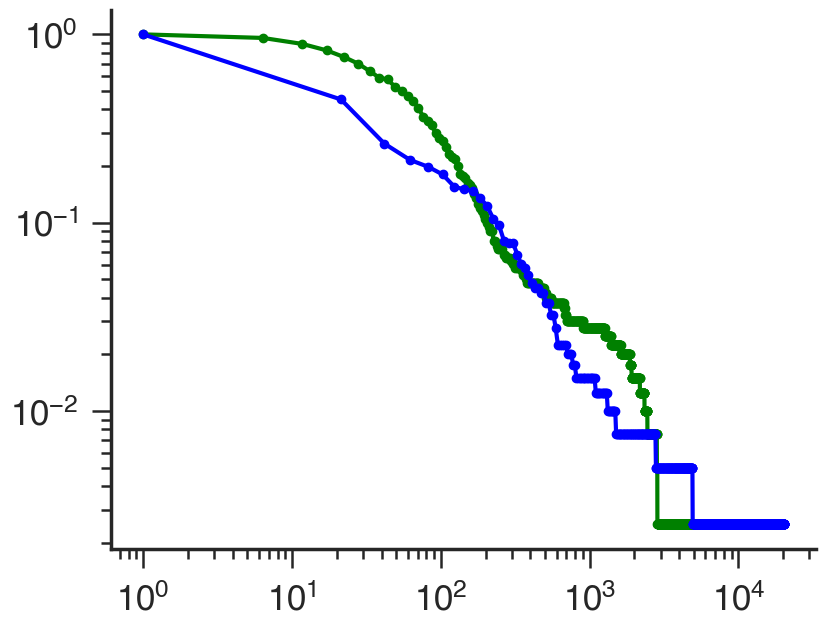

In [93]:
estado = 'PR'
df_ = edges[edges.source.isin(info[info.STATE==estado].CODE.unique()) & edges.target.isin(info[info.STATE==estado].CODE.unique())]
state_commuters_graph = nx.from_pandas_edgelist(df=df_ , edge_attr='weight', create_using=nx.DiGraph)
m = nx.adjacency_matrix(state_commuters_graph).todense()
m_shape = m.shape[0]
f, ax = plt.subplots(figsize=ordpy.stdfigsize())
plt.loglog(*cdf(np.asarray(list(state_commuters_graph.out_degree(weight='weight')))[::,1], nbins=1000).T,'-o',color='green')
plt.loglog(*cdf(np.asarray(list(state_commuters_graph.in_degree(weight='weight')))[::,1], nbins=1000).T,'-o',color='blue')